# cadCAD Experiment
Over 500 timesteps, money comes in to the system each timestep and is distributed to delegators according to the proportion of shares they have bought.  The share price and number are tied to a bonding curve.  

They purchase shares in the system according to their belief of the future revenue streams.

In [1]:
# if this crashes, run this:
# pip install ipython-autotime
%load_ext autotime
%load_ext autoreload
%autoreload 2
import sys
import pickle
import matplotlib.pyplot as plt
sys.path.append("..")

time: 437 ms (started: 2021-04-20 11:51:25 -04:00)


In [2]:
df = pickle.load(open('experiment.p', 'rb'))


time: 906 ms (started: 2021-04-20 11:51:26 -04:00)


# Revenue coming in each period.  
### Mean is an exponentially distributed parameter.  

## Shock to the system @ timestep 250.
### Timsteps 1-250: mean=7
### Timesteps 251-500: mean=70



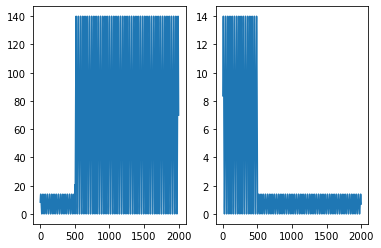

time: 500 ms (started: 2021-04-20 11:51:27 -04:00)


In [3]:
subsets = df.subset.unique()
for subset in subsets:
    df1 = df[df.subset==subset].reset_index()
    where = int(f'12{subset+1}')
    # print(where)
    plt.subplot(where)
    df1.period_revenue.plot()
    # print(df)

In [4]:
import pandas as pd
df1 = df.reset_index().delegators

delegator_revenue_token_holdings = {}
delegator_shares = {}
timestep = 0
for delegator_dict in df1:
    for delegator_id, delegator in delegator_dict.items():
        if delegator_id not in delegator_revenue_token_holdings:
            delegator_revenue_token_holdings[delegator_id] = {}
            delegator_shares[delegator_id] = {}
        delegator_revenue_token_holdings[delegator_id][timestep] = delegator.revenue_token_holdings
        delegator_shares[delegator_id][timestep] = delegator.shares
        
    timestep += 1

time: 141 ms (started: 2021-04-20 11:51:27 -04:00)


# Shares broken down by Delegator
This shows a stacked plot with the sum of shares owned by the individual delegators. There is a jump in shares at the shock point at timestep = 250 where the dividend value from owning the shares increases 10x.

<table class="tg">
<thead>
  <tr>
    <th>Delegator ID</th>
    <th>Delegator Type</th>
    <th>Delegator Pricing Model</th>
    <th>Delegator Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0</td>
    <td>Owner</td>
    <td>Value</td>
    <td>spot_price will converge to the value of the revenue stream.</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Non-Owner</td>
    <td>Regression to Mean</td>
    <td>spot_price will return to what it used to be.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Non-Owner</td>
    <td>Value</td>
    <td>spot_price will converge to the value of the revenue stream.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Non-Owner</td>
    <td>Trendline</td>
    <td>spot_price will continue moving in the same direction as it has in the past.</td>
  </tr>
</tbody>
</table>


* The delegators act in randomized order, so 0 and 2 will not have the same result.
* There is an initial spike in shares owned because the shares are not very diluted and are thus valuable.
* Then, at timestep = 250, there is another spike in shares_owned because the dividends increase by a factor of 10.

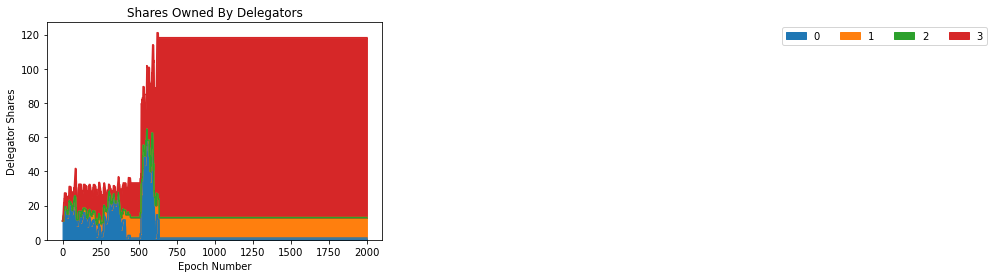

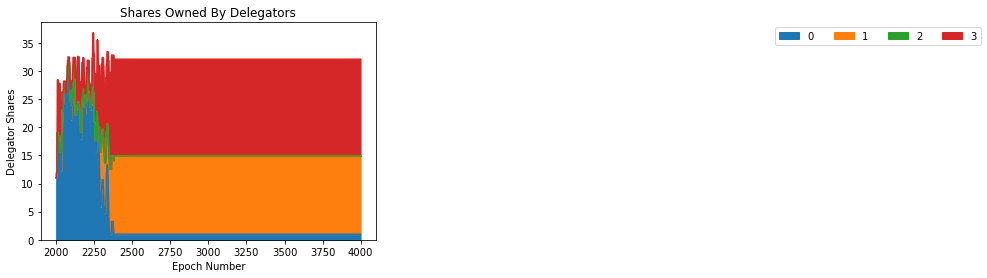

time: 828 ms (started: 2021-04-20 11:51:27 -04:00)


In [5]:

# for subset in subsets:
#     df_plot = pd.DataFrame(delegator_shares)
#     df_plot.plot(kind='area')
#     plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
#     plt.title('Shares Owned By Delegators')
#     plt.xlabel('Epoch Number')
#     plt.ylabel('Delegator Shares')
timesteps_per_subset = 2000
for subset in subsets:
    # d = df['private_prices'][subset * timesteps_per_subset:(subset + 1) * timesteps_per_subset].reset_index()
    df_plot = pd.DataFrame(delegator_shares).iloc[subset * timesteps_per_subset:(subset + 1) * timesteps_per_subset]
    df_plot.plot(kind='area')
    plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
    plt.title('Shares Owned By Delegators')
    plt.xlabel('Epoch Number')
    plt.ylabel('Delegator Shares')

# Cumulative Revenue Token Holdings



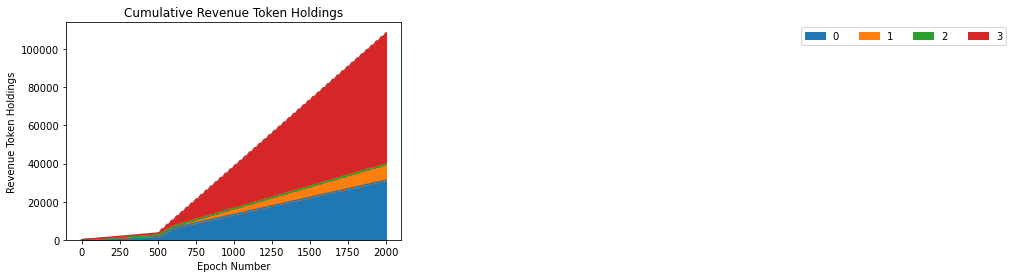

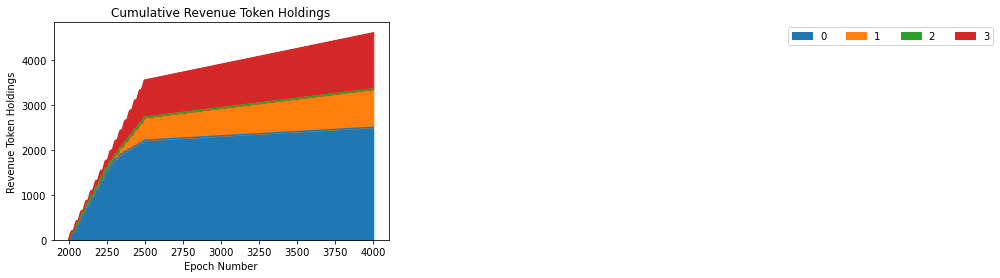

time: 907 ms (started: 2021-04-20 11:51:28 -04:00)


In [6]:
for subset in subsets:
    # d = df['private_prices'][subset * timesteps_per_subset:(subset + 1) * timesteps_per_subset].reset_index()
    df_plot = pd.DataFrame(delegator_revenue_token_holdings).iloc[subset * timesteps_per_subset:(subset + 1) * timesteps_per_subset]
    # df_plot = pd.DataFrame(delegator_revenue_token_holdings)
    df_plot.plot(kind='area')
    plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
    plt.title('Cumulative Revenue Token Holdings')
    plt.xlabel('Epoch Number')
    plt.ylabel('Revenue Token Holdings')

Exploratory data analysis

In [7]:
df['shareholders'] = df.delegators.apply(lambda x: [k for k in x.keys() if x[k].shares>0] )

time: 157 ms (started: 2021-04-20 11:51:29 -04:00)


In [8]:
df['shares'] = df.delegators.apply(lambda x: [x[k].shares for k in x.keys() if x[k].shares>0] )

time: 157 ms (started: 2021-04-20 11:51:29 -04:00)


In [9]:
df_list = []
for t in range(len(df)):
    temp_df = pd.DataFrame({'shareholder':df.shareholders.iloc[t] , 'shares':df.shares.iloc[t]})
    temp_df['Epoch Number'] = t

    df_list.append(temp_df)

shareholder_df = pd.concat(df_list)

time: 4 s (started: 2021-04-20 11:51:29 -04:00)


In [10]:
shareholder_df

,shareholder,shares,Epoch Number
0,0,11.000000,0
0,0,11.000000,1
1,3,0.900000,1
0,0,11.000000,2
1,3,1.800000,2
...,...,...,...
1,1,13.890411,3998
2,3,17.195875,3998
0,0,1.000000,3999
1,1,13.890411,3999


time: 63 ms (started: 2021-04-20 11:51:34 -04:00)


# Price per share

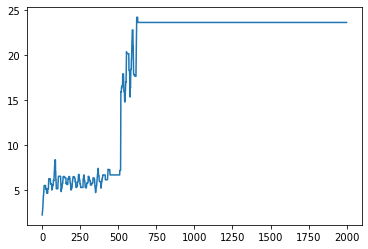

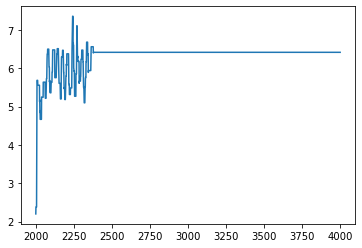

time: 594 ms (started: 2021-04-20 11:51:34 -04:00)


In [11]:
for subset in subsets:
    df1 = df[df.subset==subset]
    # where = int(f'12{subset+1}')
    # print(where)    
    # plt.subplot(where)
    df1.spot_price.plot()
    plt.show()
    


In [12]:
df['period_revenue_per_share'] = df.period_revenue/df.supply

time: 62 ms (started: 2021-04-20 11:51:34 -04:00)


# Revenue per share 

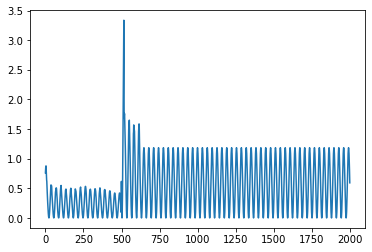

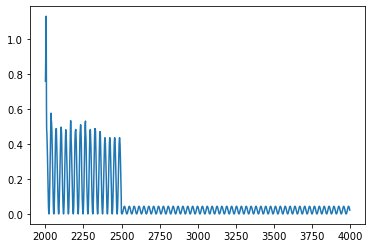

time: 547 ms (started: 2021-04-20 11:51:34 -04:00)


In [13]:
for subset in subsets:
    df1 = df[df.subset==subset]
    # where = int(f'12{subset+1}')
    # print(where)    
    # plt.subplot(where)
    df1.period_revenue_per_share.plot()
    plt.show()



# Estimated Share Valuation

In [14]:
#estimated share valuation
risk_adj = .7 #if agents get their own param then there exists an estimated value of this system level param
discount_factor = .9 #if agents get their own param there exist an estimated value of this systel level param

df['share_valuation'] = df.spot_price * risk_adj + df.period_revenue_per_share / (1 - discount_factor)
df['ewm_share_valuation'] = df.share_valuation.ewm(halflife = 50).mean()

time: 62 ms (started: 2021-04-20 11:51:35 -04:00)


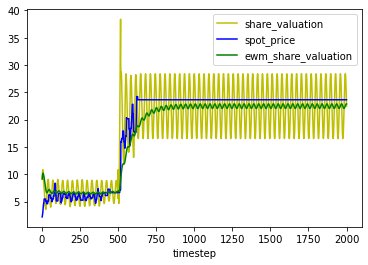

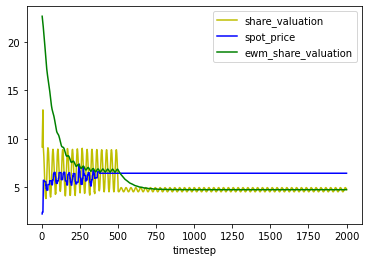

time: 703 ms (started: 2021-04-20 11:51:35 -04:00)


In [15]:
for subset in subsets:
    df1 = df[df.subset==subset]
    where = int(f'12{subset+1}')
    # print(where)    
    # plt.subplot(where)
    df1[['share_valuation', 'spot_price', 'ewm_share_valuation', 'timestep']].plot(x='timestep', color='ybg')
    plt.show()
    

# df[['share_valuation', 'spot_price', 'ewm_share_valuation', 'timestep']].plot(x='timestep', color='ybg')

In [16]:
df.columns

Index(['index', 'reserve', 'supply', 'delegators', 'period_revenue',
       'spot_price', 'expected_revenue', 'run_time', 'simulation', 'subset',
       'run', 'substep', 'timestep', 'initial_reserve', 'initial_supply',
       'owners_share', 'arrival_rate', 'expected_reserve_token_holdings',
       'delegator_estimation_noise_mean',
       'delegator_estimation_noise_variance',
       'reserve_to_revenue_token_exchange_rate', 'delegator_activity_rate',
       'mininum_required_price_pct_diff_to_act', 'risk_adjustment',
       'half_life_vesting_rate', 'cliff_vesting_timesteps',
       'num_days_for_trends', 'halflife', 'mean_discount_rate',
       'mean_smoothing_factor', 'max_delegator_count', 'shock_factor',
       'shock_timestep', 'shareholders', 'shares', 'period_revenue_per_share',
       'share_valuation', 'ewm_share_valuation'],
      dtype='object')

time: 47 ms (started: 2021-04-20 11:51:36 -04:00)


In [17]:
# each timestep has a dict with {delegatorId: private_price} 
df['private_prices'] = df.delegators.apply(lambda x: {k: x[k].private_price for k in x.keys()} )
df['regression_to_mean_private_prices'] = df.delegators.apply(lambda x: {k: x[k].regression_to_mean_private_price for k in x.keys()} )
df['value_private_prices'] = df.delegators.apply(lambda x: {k: x[k].value_private_price for k in x.keys()} )
df['trendline_private_prices'] = df.delegators.apply(lambda x: {k: x[k].trendline_private_price for k in x.keys()} )


time: 109 ms (started: 2021-04-20 11:51:36 -04:00)


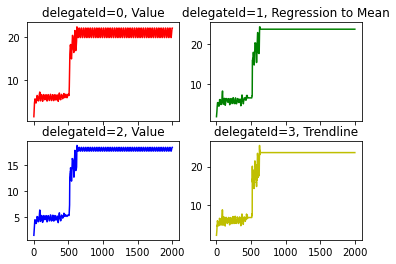

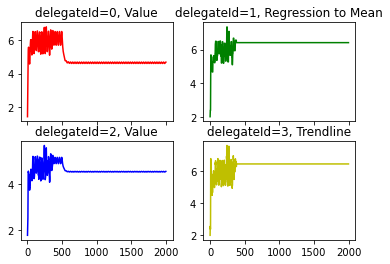

time: 1.41 s (started: 2021-04-20 11:51:36 -04:00)


In [18]:
import matplotlib.pylab as plt
timesteps_per_subset = 2000
for subset in subsets:
    # d = df['regression_to_mean_private_prices']
    # d = df['value_private_prices']
    d = df['private_prices'][subset * timesteps_per_subset:(subset + 1) * timesteps_per_subset].reset_index()
    # print(d)

    timestep = 0
    delegateId = 0

    # initialize a list of 4 lists
    x = [[] for _ in range(4)]
    y = [[] for _ in range(4)]

    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
    axs = [ax0, ax1, ax2, ax3]

    for timestep in range(2000):
        # print(d)
        # print(f'{timestep}, {d.private_prices.iloc[timestep]}')
        for delegateId, price in d.iloc[timestep].private_prices.items():    
            # print(f'{delegateId}, {price}')
            # The data has to be in the form x = [timesteps], y = [values]
            # the data is in the form y = dict({key=delegator, value=private_price})        
            x[delegateId].append(timestep)
            y[delegateId].append(price)
            
    colors = 'rgby'
    for delegateId in range(4):    
        
        axs[delegateId].plot(x[delegateId], y[delegateId], colors[delegateId])
        if delegateId in (0,2):
            axs[delegateId].set_title(f'{delegateId}, Value')
        elif delegateId == 1:
            axs[delegateId].set_title(f'{delegateId}, Regression to Mean')
        elif delegateId == 3:
            axs[delegateId].set_title(f'{delegateId}, Trendline')


    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.show()


In [19]:
df.iloc[timesteps_per_subset]['supply']

11.0

time: 62 ms (started: 2021-04-20 11:51:37 -04:00)


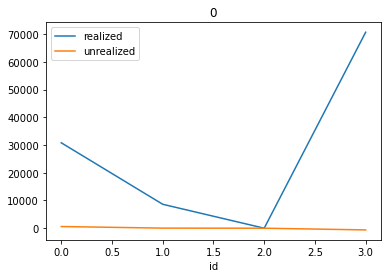

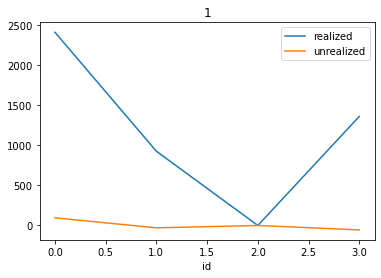

time: 531 ms (started: 2021-04-20 12:16:20 -04:00)


In [47]:
# Accounting for each delegator
initial_tokens = 10000

df_profits_list = []

for subset in subsets:
    # print(f'{subset}')
    # s = df.iloc[(timesteps_per_subset * subset) - 1]
    s = df[(df.subset == subset) & (df.timestep == timesteps_per_subset)].iloc[0]
    # print(f'{s}')
    # print(f'{s.timestep}')
    # print(f'{s.supply}')    
    # print(f'{s.reserve}')    
    for delegator in s['delegators'].values():        
        # print(f'{delegator.id}')
        # how much reserve currency they started with
        # print('started with', 10000)

        # how much reserve currency they've made
        # print(f'{delegator.revenue_token_holdings}')

        # print(f'{delegator.shares}')

        # how many shares are you holding @ spot_price
        # what would the tokens be worth if you sold them all
        # lower bound
        shutdown_value = delegator.shares / s['supply'] * s['reserve']
        # print(f'{shutdown_value}')    
        realized_profits = initial_tokens - delegator.reserve_token_holdings + delegator.revenue_token_holdings
        unrealized_profits = shutdown_value - (initial_tokens - delegator.reserve_token_holdings)
        df_profits_list.append([subset, delegator.id, realized_profits, unrealized_profits])        
        # print(f'{realized_profits=:.2f}, {unrealized_profits=:.2f}')

        
df_profits = pd.DataFrame(df_profits_list, columns=['subset', 'id', 'realized', 'unrealized'])        

for subset in subsets:
    df_profits[df_profits.subset == subset].plot(x='id', y=['realized', 'unrealized'])
    plt.title(subset)
        # unrealized_profits = value_of_shares - 


In [35]:
s.delegators.iloc[0]

{0: Delegator self.id=0, self.private_price=22.10, self.shares=1.00,
 1: Delegator self.id=1, self.private_price=23.64, self.shares=12.00,
 2: Delegator self.id=2, self.private_price=18.40, self.shares=0.00,
 3: Delegator self.id=3, self.private_price=23.64, self.shares=105.19}

time: 62 ms (started: 2021-04-20 12:06:06 -04:00)


# Questions?
* What other parameters can we add to the model?  
* What other visualizations would we like to see?

In [21]:
# df['regression_to_mean_private_prices']

# for i in range(500):
#     # print(df['regression_to_mean_private_prices'][i])
#     # print(df['value_private_prices'][i])
#     # print(df['trendline_private_prices'][i])
#     print(i, df['private_prices'][i])

time: 63 ms (started: 2021-04-20 11:51:37 -04:00)


In [22]:
# show smoothing factors are all different.
# for id in range(25):
#     print(df.iloc[499].delegators[id].smoothing_factor)

time: 62 ms (started: 2021-04-20 11:51:38 -04:00)
